<a href="https://colab.research.google.com/github/Popou123/Trabajo-Jaime-Rodriguez-Albuin/blob/main/TFG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Montamos el volumen de google drive en colab, puesto que ahí reside el dataset.
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Lectura y previsualización del dataset.

Antes de empezar a tratar nuestro dataset realizaremos unas cuantas visualizaciones para saber a qué nos enfrentaremos.

In [ ]:
import pandas as pd
metadatos = pd.read_csv('/content/gdrive/My Drive/Chest_xray_Corona_Metadata.csv')

In [ ]:
metadatos.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [ ]:
metadatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5910 non-null   int64 
 1   X_ray_image_name        5910 non-null   object
 2   Label                   5910 non-null   object
 3   Dataset_type            5910 non-null   object
 4   Label_2_Virus_category  69 non-null     object
 5   Label_1_Virus_category  4334 non-null   object
dtypes: int64(1), object(5)
memory usage: 277.2+ KB


In [ ]:
metadatos.fillna('desconocido',inplace=True)

In [ ]:
metadatos.isnull().sum()

Unnamed: 0                0
X_ray_image_name          0
Label                     0
Dataset_type              0
Label_2_Virus_category    0
Label_1_Virus_category    0
dtype: int64

In [ ]:
print(metadatos["Label_1_Virus_category"].value_counts())
print("-"*50)
print(metadatos["Label_2_Virus_category"].value_counts())

bacteria          2777
desconocido       1576
Virus             1555
Stress-Smoking       2
Name: Label_1_Virus_category, dtype: int64
--------------------------------------------------
desconocido      5841
COVID-19           58
Streptococcus       5
SARS                4
ARDS                2
Name: Label_2_Virus_category, dtype: int64


In [ ]:
normales = metadatos[metadatos.Label=='Normal']
nombres_normales = normales['X_ray_image_name']
enfermos = metadatos[metadatos.Label=='Pnemonia']
nombres_enfermos = enfermos['X_ray_image_name']

In [ ]:
print("Número de radiografías de personas sanas: " + str(len(normales)))
print("Número de radiografías de personas enferma: " + str(len(enfermos)))

Número de radiografías de personas sanas: 1576
Número de radiografías de personas enferma: 4334


In [ ]:
print(nombres_enfermos.head())
#print("Normales: " + str(len(normales)))
#print("Enfermos: " + str(len(enfermos)))

1341         person101_virus_188.jpeg
1342         person101_virus_187.jpeg
1343       person1019_virus_1708.jpeg
1344       person1019_virus_1707.jpeg
1345    person1019_bacteria_2950.jpeg
Name: X_ray_image_name, dtype: object


# Tratamiento del dataset.

In [ ]:
import os
import shutil

In [ ]:
directorio_train_og = '/content/gdrive/My Drive/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train_og'
directorio_test_og = '/content/gdrive/My Drive/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test_og'
normal = '/content/gdrive/My Drive/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/normal'
pneumonia = '/content/gdrive/My Drive/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/pneumonia'

In [ ]:
os.mkdir(normal)
os.mkdir(pneumonia)

In [ ]:
#Nos situamos en el directorio de entrenamiento del dataset mediante "os.chdir" para copiar las imágenes a las carpetas correspondientes,
#agrupándolas para poder manipularlas mejor.
os.chdir(directorio_train_og)
#Para cada nombre de las imágenes que se encuentran en el directorio de entrenamiento:
for n in nombres_normales:
  #Guardamos el nombre como una cadena. Recordemos que el módulo "os" y el módulo "shutil" trabajan con rutas.
  n_string = str(n)
  #Si existe dicha ruta, o de otra manera, dicho archivo (imagen.jpeg) en la carpeta de entrenamiento:
  if os.path.exists(n_string):
    #Montamos las rutas de origen, la cual será la ruta del directorio mas una barra y el nombre de la imagen, y la ruta de destino, la cual
    #indica dónde y qué vamos a copiar.
    origen = directorio_train_og + "/" + n_string
    destino =  normal + "/" + n_string
    shutil.copyfile(origen,destino)

#El mismo procedimiento que el anterior, esta vez buscando las radiografías de enfermos en la carpeta de entrenamiento.
for n in nombres_enfermos:
  n_string = str(n)
  if os.path.exists(n_string):
    origen = directorio_train_og + "/" + n_string
    destino = pneumonia + "/" + n_string
    shutil.copyfile(origen,destino)

#Nos situamos en la carpeta de test para repetir el mismo proceso que en la carpeta de entrenamiento.
os.chdir(directorio_test_og)
for n in nombres_normales:
  n_string = str(n)
  if os.path.exists(n_string):
    origen = directorio_test_og + "/" + n_string
    destino = normal + "/" + n_string
    shutil.copyfile(origen,destino)


for n in nombres_enfermos:
  n_string = str(n)
  if os.path.exists(n_string):
    origen = directorio_test_og + "/" + n_string
    destino = pneumonia + "/"  + n_string
    shutil.copyfile(origen,destino)

In [ ]:
#Comprobamos que se han copiado correctamente las imágenes. Hay ciertas entradas en el .csv que no existen o simplemente eran filas que guardaban otra información.
print("Cantidad de imágenes de entrenamiento: " + str(len(os.listdir(normal))))
print("Cantidad de imágenes de test: " + str(len(os.listdir(pneumonia))))

sum1 = len(os.listdir(normal)) + len(os.listdir(pneumonia))
sum2 = len(os.listdir(directorio_train_og)) + len(os.listdir(directorio_test_og))
print(sum1)
print(sum2)

In [ ]:
#Creamos la carpeta donde inicializaremos los generadores de imágenes de keras.
prep_red = '/content/gdrive/My Drive/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/prep'

In [ ]:
os.mkdir(prep_red)

In [ ]:
#Muevo las carpetas de radiografías de gente sana y de gente enferma a otra carpeta, donde dividiremos mediante un generador las muestras de entrenamiento, 
#,test y validación. 

shutil.move(normal,prep_red)
shutil.move(pneumonia,prep_red)

In [ ]:
#Comprobamos que se han movido correctamente:
normal2 = prep_red + "/normal"
pneumonia2 = prep_red + "/pneumonia"

print("Cantidad de imágenes de personas sanas: " + str(len(os.listdir(normal2))))
print("Cantidad de imágenes de personas enfermas: " + str(len(os.listdir(pneumonia2))))

sum1 = len(os.listdir(normal2)) + len(os.listdir(pneumonia2))
sum2 = len(os.listdir(directorio_train_og)) + len(os.listdir(directorio_test_og))
print(sum1)
print(sum2)

Cantidad de imágenes de personas sanas: 1576
Cantidad de imágenes de personas enfermas: 4334
5910
5933


In [15]:
prep_red = '/content/gdrive/My Drive/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/prep'
directorio_train = prep_red + "/train"
directorio_test = prep_red + "/test"
directorio_validation = prep_red + "/validation"

normal_train = directorio_train + "/normal"
normal_test = directorio_test + "/normal"
normal_validation = directorio_validation + "/normal"

pneumonia_train = directorio_train + "/pneumonia"
pneumonia_test = directorio_test + "/pneumonia"
pneumonia_validation = directorio_validation + "/pneumonia"

In [ ]:
os.mkdir(directorio_train)
os.mkdir(directorio_test)
os.mkdir(directorio_validation)

In [ ]:
os.mkdir(normal_train)
os.mkdir(normal_test)
os.mkdir(normal_validation)
os.mkdir(pneumonia_train)
os.mkdir(pneumonia_test)
os.mkdir(pneumonia_validation)

In [ ]:
os.mkdir(normal_validation)
os.mkdir(pneumonia_validation)

In [ ]:
os.mkdir(directorio_validation)
os.mkdir(pneumonia_validation)
os.mkdir(normal_validation)

In [ ]:
def divide_dataset(directorio, p, q):
  #Salvamos la dirección de la carpeta de radiografías de personas sanas para su posterior acceso.
  directorio_normal = directorio + "/normal"
  #Accedemos al directorio donde se encuentran todas las imágenes de personas sanas que existen en nuestro dataset.
  normales = os.listdir(directorio_normal)
  #Estas 3 variables nos servirán para decidir si una imagen se copiará a la carpeta de entrenamiento, a la de validación o a la de pruebas.
  #En "i" guardaremos el resultado de multiplicar el número total de imágenes de personas sanas del dataset por el porcentaje de muestras que queremos que
  #se situen entre entrenamiento y validación. Lo convertiremos a entero ya que querremos obtener un número entero de imágenes.
  i = int(len(normales)*p)
  #En "k" realizaremos la multiplicación entre "i" y "q", siendo q el porcentaje de muestras de validación que salvaremos, contando con que el resto lo usaremos
  #para entrenamiento. También lo convertiremos a entero por las mismas razones. 
  k = int(i*q)
  #En "e" guardaremos el resto de imágenes normales guardaremos en entrenamiento, siendo estas parte del número de muestras que acoge "i" (número total de imágenes
  #entre entrenamiento y validación). 
  
  #Ejemplo: En caso de tener 10 muestras, si queremos guardar el 80% para entrenamiento y validación nos quedarían 8. Si de esas 8 quisiéramos un cuarto para validación
  #tendríamos que multiplicar ese 8 por 0.25, de manera que nos quedarían 2 muestras para validación. Por ello, el número de muestras para entrenamiento
  #debería ser el número total entre entrenamiento y validación menos el número de muestras para validación: 8-2 = 6 imágenes de entrenamiento. 

  e = i-k
  #Inicializaremos los contadores que servirán para decidir en qué directorio copiaremos las imágenes para separarlas en entrenamiento, validación y pruebas.
  x = 0
  v = 0
  for n in normales:
    if x<=e:
      #Si x es menor que el número de imágenes correspondientes a entrenamiento:

      #Guardamos el nombre como una cadena. Recordemos que el módulo "os" y el módulo "shutil" trabajan con rutas.
      n_string = str(n)
      #Montamos las rutas de origen, la cual será la ruta del directorio mas una barra y el nombre de la imagen, y la ruta de destino, la cual
      #indica dónde y qué vamos a copiar.
      origen = directorio_normal + "/" + n_string
      destino =  directorio + "/train/normal/" + n_string
      shutil.copyfile(origen,destino)
      x += 1
    elif x>e and v<=k:
      #Si x es mayor que el número de muestras de entrenamiento, pero es menor que el número de muestras de validación:

      n_string = str(n)
      origen = directorio_normal + "/" + n_string
      destino =  directorio + "/validation/normal/" + n_string
      shutil.copyfile(origen,destino)
      v +=1
    else:
      #En cualquier otro caso la guardaremos en test.
      n_string = str(n)
      origen = directorio_normal + "/" + n_string
      destino =  directorio + "/test/normal/" + n_string
      shutil.copyfile(origen,destino)
      
  #Repetimos el mismo proceso anterior pero esta vez para las radiografías de pacientes enfermos.
  
  directorio_pneumonia = directorio + "/pneumonia"
  enfermos = os.listdir(directorio_pneumonia)
  j = int(len(enfermos)*p)
  l = int(j*q)
  w = j-l
  z = 0
  y = 0
  
  for n in enfermos:
    if y<=w: 
      #Guardamos el nombre como una cadena. Recordemos que el módulo "os" y el módulo "shutil" trabajan con rutas.
      n_string = str(n)
      #Montamos las rutas de origen, la cual será la ruta del directorio mas una barra y el nombre de la imagen, y la ruta de destino, la cual
      #indica dónde y qué vamos a copiar.
      origen = directorio_pneumonia + "/" + n_string
      destino =  directorio + "/train/pneumonia/" + n_string
      shutil.copyfile(origen,destino)
      y += 1
    elif y>w and z<=l:
      n_string = str(n)
      #Montamos las rutas de origen, la cual será la ruta del directorio mas una barra y el nombre de la imagen, y la ruta de destino, la cual
      #indica dónde y qué vamos a copiar.
      origen = directorio_pneumonia + "/" + n_string
      destino =  directorio + "/validation/pneumonia/" + n_string
      shutil.copyfile(origen,destino)
      z +=1
    else:
      #Guardamos el nombre como una cadena. Recordemos que el módulo "os" y el módulo "shutil" trabajan con rutas.
      n_string = str(n)
      #Montamos las rutas de origen, la cual será la ruta del directorio mas una barra y el nombre de la imagen, y la ruta de destino, la cual
      #indica dónde y qué vamos a copiar.
      origen = directorio_pneumonia + "/" + n_string
      destino =  directorio + "/test/pneumonia/" + n_string
      shutil.copyfile(origen,destino)

In [ ]:
divide_dataset(prep_red,0.8,0.2)

In [ ]:
n_normales_train = len(os.listdir(str(prep_red + "/train/normal")))
n_enfermos_train = len(os.listdir(str(prep_red + "/train/pneumonia")))
n_normales_test = len(os.listdir(str(prep_red + "/test/normal")))
n_enfermos_test = len(os.listdir(str(prep_red + "/test/pneumonia")))
n_normales_val = len(os.listdir(str(prep_red + "/validation/normal")))
n_enfermos_val = len(os.listdir(str(prep_red + "/validation/pneumonia")))

print("Cantidad de imágenes de imágenes de pulmones sanos en la carpeta de entrenamiento: " + str(n_normales_train))
print("Cantidad de imágenes de imágenes de pulmones enfermos en la carpeta de entrenamiento: " + str(n_enfermos_train))
print("Cantidad de imágenes de imágenes de pulmones sanos en la carpeta de validación: " + str(n_normales_val))
print("Cantidad de imágenes de imágenes de pulmones enfermos en la carpeta de validación: " + str(n_enfermos_val))
print("Cantidad de imágenes de imágenes de pulmones sanos en la carpeta de test: " + str(n_normales_test))
print("Cantidad de imágenes de imágenes de pulmones enfermos en la carpeta de test: " + str(n_enfermos_test))

print("Imagenes de pacientes: " + str(n_normales_train + n_enfermos_train + n_normales_test + n_enfermos_test + n_normales_val + n_enfermos_val))

Cantidad de imágenes de imágenes de pulmones sanos en la carpeta de entrenamiento: 1009
Cantidad de imágenes de imágenes de pulmones enfermos en la carpeta de entrenamiento: 2775
Cantidad de imágenes de imágenes de pulmones sanos en la carpeta de validación: 253
Cantidad de imágenes de imágenes de pulmones enfermos en la carpeta de validación: 694
Cantidad de imágenes de imágenes de pulmones sanos en la carpeta de test: 314
Cantidad de imágenes de imágenes de pulmones enfermos en la carpeta de test: 865
Imagenes de pacientes: 5910


# Primera red neuronal.

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [16]:
from keras.preprocessing.image import ImageDataGenerator

datagen_entrenamiento = ImageDataGenerator(rescale=1./255)
datagen_validacion = ImageDataGenerator(rescale=1./255)

generador_entrenamiento = datagen_entrenamiento.flow_from_directory(
    directorio_train,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

generador_validacion = datagen_validacion.flow_from_directory(
    directorio_validation,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 3784 images belonging to 2 classes.
Found 947 images belonging to 2 classes.


## Entrenamiento

In [ ]:
# 3784/20 porque es el número entero de imágenes entre en número de batches
# 947/20 porque es el número entero de imágenes entre en número de batches
#steps_per_epoch=int(3784/20),
#validation_steps=int(947/20/20)

#Importamos pandas para poder guardar el historial del entrenamiento en el drive.
import pandas as pd

historial = model.fit(
    generador_entrenamiento,
    epochs=10,
    validation_data=generador_validacion
        )
pd.DataFrame.from_dict(historial.history).to_csv('/content/gdrive/My Drive/historial_modelo_1.csv',index=False)

Epoch 1/10
190/190 [==============================] - 1464s 8s/step - loss: 0.4986 - acc: 0.7740 - val_loss: 0.4943 - val_acc: 0.7804
Epoch 2/10
190/190 [==============================] - 202s 1s/step - loss: 0.2319 - acc: 0.9099 - val_loss: 0.1909 - val_acc: 0.9187
Epoch 3/10
190/190 [==============================] - 202s 1s/step - loss: 0.1892 - acc: 0.9247 - val_loss: 0.1566 - val_acc: 0.9335
Epoch 4/10
190/190 [==============================] - 202s 1s/step - loss: 0.1474 - acc: 0.9411 - val_loss: 0.1717 - val_acc: 0.9250
Epoch 5/10
190/190 [==============================] - 202s 1s/step - loss: 0.1471 - acc: 0.9399 - val_loss: 0.1346 - val_acc: 0.9483
Epoch 6/10
190/190 [==============================] - 202s 1s/step - loss: 0.1309 - acc: 0.9477 - val_loss: 0.1152 - val_acc: 0.9535
Epoch 7/10
190/190 [==============================] - 202s 1s/step - loss: 0.1243 - acc: 0.9508 - val_loss: 0.1259 - val_acc: 0.9514
Epoch 8/10
190/190 [==============================] - 202s 1s/step -

In [ ]:
#Importamos pandas para poder cargar el historial del entrenamiento en el drive.
import pandas as pd
historial = pd.read_csv('/content/gdrive/My Drive/historial_modelo_1.csv').to_dict()

In [ ]:
print(historial['val_acc'].values())

dict_values([0.7803590297698975, 0.9186906218528748, 0.9334741234779358, 0.9250264167785645, 0.9482576847076416, 0.9535374641418456, 0.951425552368164, 0.9545934796333312, 0.9588173031806946, 0.951425552368164])


In [ ]:
#Guardamos el modelo en el drive para no tener que entrenarlo cada vez que inicie el colab.
model.save('/content/gdrive/My Drive/primer_red.h5')

[0.8298097252845764, 0.9122621417045592, 0.9270613193511964, 0.9323467016220092, 0.93974632024765, 0.9452959895133972, 0.9497885704040528, 0.9550740122795104, 0.9598308801651, 0.9582452178001404]


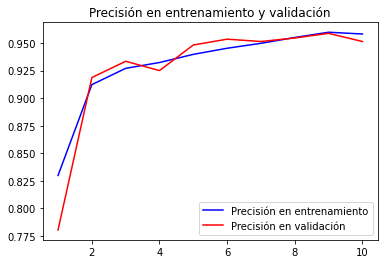

In [ ]:
#Mostraremos unas gráficas que muestren cómo han evolucionado tanto el valor de pérdida como la precisión:
from matplotlib import pyplot

prec = list(historial['acc'].values())
validacion_prec = list(historial['val_acc'].values())
perdida = list(historial['loss'].values())
validacion_perdida = list(historial['val_loss'].values())

n_epochs = range(1, len(prec) + 1)

pyplot.plot(n_epochs, prec, 'b', label='Precisión en entrenamiento')
pyplot.plot(n_epochs, validacion_prec, 'r', label='Precisión en validación')
pyplot.title('Precisión en entrenamiento y validación')
pyplot.legend()
pyplot.show()

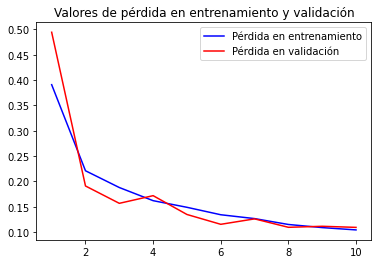

In [ ]:
pyplot.plot(n_epochs, perdida, 'b', label='Pérdida en entrenamiento')
pyplot.plot(n_epochs, validacion_perdida, 'r', label='Pérdida en validación')
pyplot.title('Valores de pérdida en entrenamiento y validación')
pyplot.legend()
pyplot.show()

In [ ]:
#Lo cargamos y comprobamos que se ha cargado correctamente.
from keras.models import load_model
model = load_model('/content/gdrive/My Drive/primer_red.h5')

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

## Pruebas

In [17]:
datagen_test = ImageDataGenerator(rescale=1./255)

generador_test = datagen_test.flow_from_directory(
directorio_test,
target_size=(150, 150),
batch_size=20,
class_mode='binary')


Found 1179 images belonging to 2 classes.


In [ ]:
historial_test_prec = []
historial_test_loss = []
pasos = 20
for i in range(pasos):
  ev = model.evaluate(generador_test, steps=50)
  historial_test_loss.append(ev[0])
  historial_test_prec.append(ev[1])
historial_test = {}
historial_test['acc'] = historial_test_prec
historial_test['loss'] = historial_test_loss
pd.DataFrame.from_dict(historial_test).to_csv('/content/gdrive/My Drive/historial_modelo_1_test.csv',index=False)

50/50 [==============================] - 22s 438ms/step - loss: 0.0983 - acc: 0.9640


In [ ]:
historial_test = pd.read_csv('/content/gdrive/My Drive/historial_modelo_1_test.csv').to_dict()
print(list(historial_test['loss'].values()))
print(list(historial_test['acc'].values()))

[0.09575502574443816, 0.10425923764705658, 0.09622352570295334, 0.09777142107486723, 0.1034586951136589, 0.09743334352970123, 0.09619996696710588, 0.1018453910946846, 0.093491330742836, 0.09301741421222688, 0.10074589401483536, 0.09655837714672087, 0.092072531580925, 0.09472998976707457, 0.09876859188079834, 0.0856667309999466, 0.09640450775623323, 0.09535546600818634, 0.09120313078165054, 0.09831154346466063]
[0.9639999866485596, 0.9610000252723694, 0.9649999737739564, 0.9660000205039978, 0.962000012397766, 0.9649999737739564, 0.9639999866485596, 0.9639999866485596, 0.9670000076293944, 0.9670000076293944, 0.9639999866485596, 0.9670000076293944, 0.9679999947547911, 0.968999981880188, 0.9639999866485596, 0.9710000157356262, 0.9660000205039978, 0.9660000205039978, 0.9670000076293944, 0.9639999866485596]


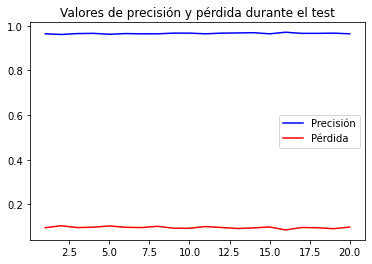

In [ ]:
from matplotlib import pyplot
import pandas as pd

historial_test = pd.read_csv('/content/gdrive/My Drive/historial_modelo_1_test.csv').to_dict()
historial_test_prec = list(historial_test['acc'].values())
historial_test_loss = list(historial_test['loss'].values())


n_pasos = range(1, len(historial_test_prec) + 1)

pyplot.plot(n_pasos, historial_test_prec, 'b', label='Precisión')
pyplot.plot(n_pasos, historial_test_loss, 'r', label='Pérdida')
pyplot.title('Valores de precisión y pérdida durante el test')
pyplot.legend()
pyplot.show()

# Segunda red: con ampliación de datos.

In [ ]:
#Ahora probaremos a modificar datos. Como no disponemos de más imágenes tendremos que realizar pequeñas modificaciones sobre las que ya poseemos:
generador_datos = ImageDataGenerator(
    #Rango de grado de rotación
    rotation_range=40,
    #Rango de anchura que se modificará
    width_shift_range=0.15,
    #Rango de altura que se modificará
    height_shift_range=0.15,
    #Rango de zoom
    zoom_range=0.15,
    #Si a algunas imágenes se les dará la vuelta horizontalmente
    horizontal_flip=True,
    #Qué hacer con los nuevos píxeles. En nuestro caso que obtengan el valor del píxel original más cercano
    fill_mode='nearest'
)

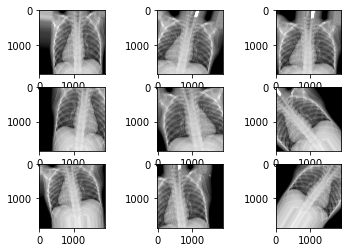

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from matplotlib import pyplot
from numpy import expand_dims

#Cargamos la imagen de ejemplo
imagen_prueba = load_img(directorio_train + '/normal/NORMAL2-IM-0401-0001.jpeg')
#La transformamos a array de numpy para poder tratarla
array = img_to_array(imagen_prueba)
#Le añadimos un eje más, ya que
muestra = expand_dims(array,0)
iterador = generador_datos.flow(muestra,batch_size=1)

for i in range(9):
  pyplot.subplot(330 + 1 + i)
	#Generamos un batch de imágenes
  batch = iterador.next()
	#Cambiamos los valores del array a enteros sin signo para poder mostrarlos con pyplot 
  image = batch[0].astype('uint8')
	#Mostramos la imagen
  pyplot.imshow(image)
#Mostramos la figura entera
pyplot.show()


In [ ]:
#Ahora entrenaremos la red con este nuevo generador. Solo lo aplicaremos para las imágenes de entrenamiento, y no con las de validación.

datagen_entrenamiento = generador_datos
datagen_validacion = ImageDataGenerator(rescale=1./255)

generador_entrenamiento = datagen_entrenamiento.flow_from_directory(
    directorio_train,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

generador_validacion = datagen_validacion.flow_from_directory(
    directorio_validation,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 3784 images belonging to 2 classes.
Found 947 images belonging to 2 classes.


In [ ]:
#Reiniciamos el modelo para poder comprobar su funcionamiento al añadir datos, y de paso le añadimos la capa de "dropout".

from keras import layers
from keras import models

modelo2 = models.Sequential()

modelo2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
modelo2.add(layers.MaxPooling2D((2, 2)))
modelo2.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelo2.add(layers.MaxPooling2D((2, 2)))
modelo2.add(layers.Conv2D(128, (3, 3), activation='relu'))
modelo2.add(layers.MaxPooling2D((2, 2)))
modelo2.add(layers.Conv2D(128, (3, 3), activation='relu'))
modelo2.add(layers.MaxPooling2D((2, 2)))

modelo2.add(layers.Flatten())
modelo2.add(layers.Dropout(0.5))
modelo2.add(layers.Dense(512, activation='relu'))
modelo2.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from keras import optimizers

modelo2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## Entrenamiento

In [ ]:
historial2 = modelo2.fit(
    generador_entrenamiento,
    epochs=10,
    validation_data=generador_validacion
)
pd.DataFrame.from_dict(historial2.history).to_csv('/content/gdrive/My Drive/historial_modelo_2.csv',index=False)

Epoch 1/10
190/190 [==============================] - 228s 1s/step - loss: 7.2770 - acc: 0.6365 - val_loss: 0.6800 - val_acc: 0.7328
Epoch 2/10
190/190 [==============================] - 228s 1s/step - loss: 0.6330 - acc: 0.7269 - val_loss: 0.6701 - val_acc: 0.7328
Epoch 3/10
190/190 [==============================] - 227s 1s/step - loss: 0.5226 - acc: 0.7754 - val_loss: 0.6629 - val_acc: 0.7328
Epoch 4/10
190/190 [==============================] - 226s 1s/step - loss: 0.4755 - acc: 0.7934 - val_loss: 0.6591 - val_acc: 0.7328
Epoch 5/10
190/190 [==============================] - 226s 1s/step - loss: 0.4260 - acc: 0.8222 - val_loss: 0.6527 - val_acc: 0.7328
Epoch 6/10
190/190 [==============================] - 226s 1s/step - loss: 0.4136 - acc: 0.8154 - val_loss: 0.6502 - val_acc: 0.7328
Epoch 7/10
190/190 [==============================] - 225s 1s/step - loss: 0.3976 - acc: 0.8289 - val_loss: 0.6443 - val_acc: 0.7328
Epoch 8/10
190/190 [==============================] - 224s 1s/step - 

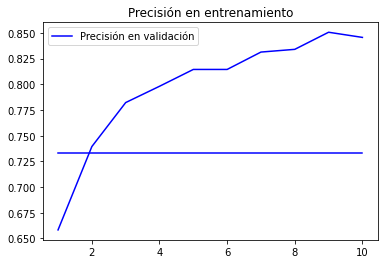

In [ ]:
from matplotlib import pyplot
import pandas as pd
historial2 = pd.read_csv('/content/gdrive/My Drive/historial_modelo_2.csv').to_dict()

prec2 = list(historial2['acc'].values())
validacion_prec2 = list(historial2['val_acc'].values())
perdida2 = list(historial2['loss'].values())
validacion_perdida2 = list(historial2['val_loss'].values())

n_epochs2 = range(1, len(prec) + 1)

pyplot.plot(n_epochs2, prec2, 'b')
pyplot.plot(n_epochs2, validacion_prec2, 'b', label='Precisión en validación')
pyplot.title('Precisión en entrenamiento')
pyplot.legend()
pyplot.show()

No handles with labels found to put in legend.


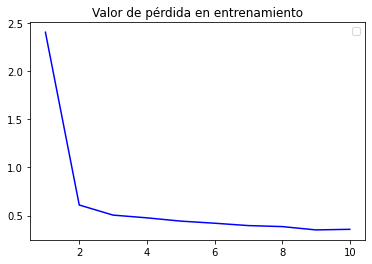

In [ ]:
pyplot.plot(n_epochs2, perdida2, 'b')
#pyplot.plot(n_epochs2, val_loss2, 'b', label='Pérdida en validación')
pyplot.title('Valor de pérdida en entrenamiento')
pyplot.legend()
pyplot.show()

In [ ]:
#Guardamos el nuevo modelo en el drive.
modelo2.save('/content/gdrive/My Drive/segunda_red.h5')

In [ ]:
from keras.models import load_model
modelo2 = load_model('/content/gdrive/My Drive/segunda_red.h5')

## Pruebas

In [ ]:
historial2_test_prec = []
historial2_test_loss = []
pasos = 20
for i in range(pasos):
  ev = modelo2.evaluate(generador_test, steps=50)
  historial2_test_loss.append(ev[0])
  historial2_test_prec.append(ev[1])
historial2_test = {}
historial2_test['acc'] = historial2_test_prec
historial2_test['loss'] = historial2_test_loss
pd.DataFrame.from_dict(historial2_test).to_csv('/content/gdrive/My Drive/historial_modelo_2_test.csv',index=False)

50/50 [==============================] - 23s 457ms/step - loss: 0.6347 - acc: 0.7300


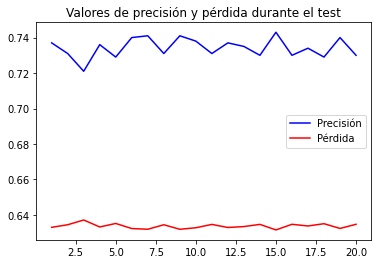

In [ ]:
from matplotlib import pyplot
#Copiamos el 
import pandas as pd

historial2_test = pd.read_csv('/content/gdrive/My Drive/historial_modelo_2_test.csv').to_dict()
historial2_test_prec = list(historial2_test['acc'].values())
historial2_test_loss = list(historial2_test['loss'].values())


n_pasos = range(1, len(historial2_test_prec) + 1)

pyplot.plot(n_pasos, historial2_test_prec, 'b', label='Precisión')
pyplot.plot(n_pasos, historial2_test_loss, 'r', label='Pérdida')
pyplot.title('Valores de precisión y pérdida durante el test')
pyplot.legend()
pyplot.show()

# Transfer learning.

## VGG16

Ahora procederemos a comparar nuestras redes con las redes de la Universidad de Oxford: VGG16, la red de Google: InceptionV3 y ResNet 50.



In [ ]:
#Importamos la red VGG16 desde keras
from keras.applications.vgg16 import VGG16

#Inicializamos la red. Le indicamos que los pesos se inicialicen con los valores tras su entreno con el dataset 'imagenet', sin incluir la última capa, la cual no servirá para
#sustituirla por nuestra última capa, convirtiendo la red en un clasificador binario, e indicándole las dimensiones del tensor de entrada (las dimensiones de las imágenes).
modelo_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

#Mostramos la red
modelo_vgg.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [ ]:
#Para no utilizar únicamente los pesos de las capas convolucionales, añadiremos al final de nuestra nueva red una pequeña red convolucional. Para ello tendremos
#que montar nuestra red de manera paralela y la fusionaremos con la red VGG16, añiéndola al final.
from keras import layers
from keras import Model
from keras import optimizers
#Obtenemos el tensor de salida de la última capa de la red VGG16.
x = modelo_vgg.layers[-1].output

#Añadimos a dicha variable las capas de la red neuronal que queremos acoplar en la VGG16.
x = layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)) (x)
x = layers.MaxPooling2D((2, 2)) (x)
x = layers.Flatten() (x)
x = layers.Dense(512, activation='relu') (x)
x = layers.Dropout(0.5) (x)
x = layers.Dense(1, activation='softmax') (x)

#Montamos nuestro nuevo modelo, indicándole los tensores de entrada y de salida del nuevo modelo. Como vamos a montar nuestra red 
#encima de las capas convolucionales de la red VGG16, nuestro input será el mismo que el de dicha red, y el output será el de la nuestra.
modelo_transfer_1 = Model(inputs=modelo_vgg.input, outputs=x)

#Ahora procederemos a "congelar" las capas que NO entrenaremos de la red, que serán las que provienen de VGG16, puesto que ya fueron entrenadas con el dataset "imagenet"
#y tardaríamos demasiado en volver a entrenarla desde 0, puesto que posee 14.714.688 parámetros.

for capa in modelo_transfer_1.layers[:-6]:
  capa.trainable = False

#Ahora compilaremos nuestra red. Utilizaremos de función de pérdida la entropía cruzada binaria, de optimizador "rmsprop" y de métrica "precisión".

modelo_transfer_1.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


Mostraremos nuestra nueva red y comprobaremos tanto que se hayan acoplado VGG16 y nuestra pequeña red correctamente, como que los pesos entrenables sean los de nuestra red.

In [ ]:
modelo_transfer_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Podemos observar que se han montado bien las dos redes y que los pesos entrenables son los de las capas acopladas, puesto que: "Trainable params: 164,897" y 147488 de nuestra capa convolucional, mas 16896 de nuestra capa totalmente conectada, mas 513 parámetros de nuestra última capa suman 164,897

Ahora procederemos con el entrenamiento.

### Entrenamiento

In [ ]:
historial_vgg = modelo_transfer_1.fit(
    generador_entrenamiento,
    epochs=10,
    validation_data=generador_validacion
        )
pd.DataFrame.from_dict(historial_vgg.history).to_csv('/content/gdrive/My Drive/historial_modelo_vgg.csv',index=False)

Epoch 1/10
190/190 [==============================] - 959s 5s/step - loss: 1.1031 - acc: 0.7245 - val_loss: 0.6505 - val_acc: 0.7328
Epoch 2/10
190/190 [==============================] - 954s 5s/step - loss: 0.4022 - acc: 0.7292 - val_loss: 0.6361 - val_acc: 0.7328
Epoch 3/10
190/190 [==============================] - 954s 5s/step - loss: 0.3373 - acc: 0.7350 - val_loss: 0.6159 - val_acc: 0.7328
Epoch 4/10
190/190 [==============================] - 955s 5s/step - loss: 0.2848 - acc: 0.7254 - val_loss: 0.6064 - val_acc: 0.7328
Epoch 5/10
190/190 [==============================] - 954s 5s/step - loss: 0.2833 - acc: 0.7306 - val_loss: 0.6109 - val_acc: 0.7328
Epoch 6/10
190/190 [==============================] - 951s 5s/step - loss: 0.2388 - acc: 0.7241 - val_loss: 0.6096 - val_acc: 0.7328
Epoch 7/10
190/190 [==============================] - 954s 5s/step - loss: 0.2416 - acc: 0.7436 - val_loss: 0.5861 - val_acc: 0.7328
Epoch 8/10
190/190 [==============================] - 955s 5s/step - 

AttributeError: ignored

In [ ]:
pd.DataFrame.from_dict(historial_vgg.history).to_csv('/content/gdrive/My Drive/historial_modelo_vgg.csv',index=False)

Procederemos ahora a mostrar las gráficas de precisión y pérdida tras el entrenamiento.

No handles with labels found to put in legend.


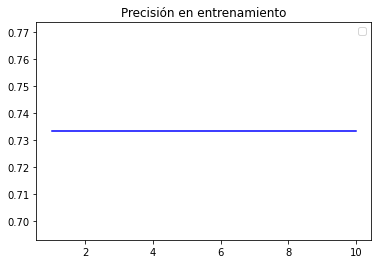

In [3]:
from matplotlib import pyplot
import pandas as pd
historial_vgg = pd.read_csv('/content/gdrive/My Drive/historial_modelo_vgg.csv').to_dict()
prec2 = list(historial_vgg['acc'].values())
#validacion_prec2 = historial2.history['val_acc']
perdida2 = list(historial_vgg['loss'].values())
#validacion_perdida2 = historial2.history['val_loss']
n_epochs2 = range(1, len(prec2) + 1)

pyplot.plot(n_epochs2, prec2, 'b')
#pyplot.plot(n_epochs2, validacion_prec2, 'b', label='Precisión en validación')
pyplot.title('Precisión en entrenamiento')
pyplot.legend()
pyplot.show()

No handles with labels found to put in legend.


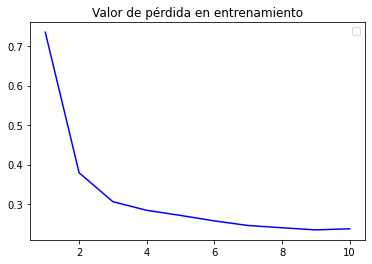

In [4]:
pyplot.plot(n_epochs2, perdida2, 'b')
#pyplot.plot(n_epochs2, val_loss2, 'b', label='Pérdida en validación')
pyplot.title('Valor de pérdida en entrenamiento')
pyplot.legend()
pyplot.show()

Guardaremos la red neuronal junto a sus pesos en la nube.

In [ ]:
modelo_transfer_1.save('/content/gdrive/My Drive/vgg_red.h5') 

In [ ]:
from keras.models import load_model
modelo_transfer_1 = load_model('/content/gdrive/My Drive/vgg_red.h5')

### Pruebas

In [ ]:
historial_vgg_test_prec = []
historial_vgg_test_loss = []
pasos = 20
for i in range(pasos):
  ev = modelo_transfer_1.evaluate(generador_test, steps=50)
  historial_vgg_test_loss.append(ev[0])
  historial_vgg_test_prec.append(ev[1])
historial_vgg_test = {}
historial_vgg_test['acc'] = historial_vgg_test_prec
historial_vgg_test['loss'] = historial_vgg_test_loss
pd.DataFrame.from_dict(historial_vgg_test).to_csv('/content/gdrive/My Drive/historial_modelo_vgg_test.csv',index=False)

50/50 [==============================] - 226s 5s/step - loss: 0.5831 - acc: 0.7300


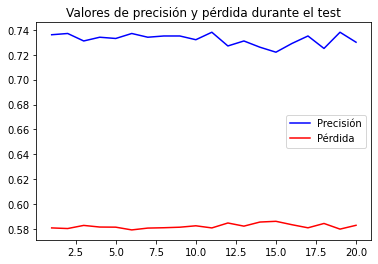

In [ ]:
from matplotlib import pyplot

import pandas as pd

historial_vgg_test = pd.read_csv('/content/gdrive/My Drive/historial_modelo_vgg_test.csv').to_dict()
historial_vgg_test_prec = list(historial_vgg_test['acc'].values())
historial_vgg_test_loss = list(historial_vgg_test['loss'].values())


n_pasos = range(1, len(historial_vgg_test_prec) + 1)

pyplot.plot(n_pasos, historial_vgg_test_prec, 'b', label='Precisión')
pyplot.plot(n_pasos, historial_vgg_test_loss, 'r', label='Pérdida')
pyplot.title('Valores de precisión y pérdida durante el test')
pyplot.legend()
pyplot.show()

## InceptionV3

Ahora toca realizar la experimentación con la red InceptionV3. Keras ofrece una implementación ya entrenada con los pesos de 'imagenet', igual que con VGG16.

In [10]:
#Importamos la red InceptionV3 desde keras
from keras.applications import InceptionV3

#Inicializamos la red. Le indicamos que los pesos se inicialicen con los valores tras su entreno con el dataset 'imagenet', sin incluir la última capa, la cual no servirá para
#sustituirla por nuestra última capa, convirtiendo la red en un clasificador binario, e indicándole las dimensiones del tensor de entrada (las dimensiones de las imágenes).
modelo_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(150,150,3))

#Mostramos la red
modelo_inception.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________

Repetimos el mismo proceso que realizamos sobre VGG16

In [18]:
#Para no utilizar únicamente los pesos de las capas convolucionales, añadiremos al final de nuestra nueva red capas para aplanar la red y poder conectarla a unas
#capas totalmente conectadas.
from keras import layers
from keras import Model
from keras import optimizers
#Obtenemos el tensor de salida de la última capa de la red VGG16.
x = modelo_inception.layers[-1].output

#Añadimos a dicha variable las capas de allanamiento que queremos acoplar en la red.
x = layers.Flatten() (x)
x = layers.Dense(512, activation='relu') (x)
x = layers.Dropout(0.5) (x)
x = layers.Dense(1, activation='softmax') (x)

#Montamos nuestro nuevo modelo, indicándole los tensores de entrada y de salida del nuevo modelo. Como vamos a montar nuestra red 
#encima de las capas convolucionales de la red VGG16, nuestro input será el mismo que el de dicha red, y el output será el de la nuestra.
modelo_transfer_2 = Model(inputs=modelo_inception.input, outputs=x)

#Ahora procederemos a "congelar" las capas que NO entrenaremos de la red, que serán las que provienen de VGG16, puesto que ya fueron entrenadas con el dataset "imagenet"
#y tardaríamos demasiado en volver a entrenarla desde 0, puesto que posee 14.714.688 parámetros.

for capa in modelo_transfer_2.layers[:-4]:
  capa.trainable = False

#Ahora compilaremos nuestra red. Utilizaremos de función de pérdida la entropía cruzada binaria, de optimizador "rmsprop" y de métrica "precisión".

modelo_transfer_2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


In [ ]:
modelo_transfer_2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_9[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
____________________________________________________________________________________________

### Entrenamiento

In [19]:
historial_inception = modelo_transfer_2.fit(
    generador_entrenamiento,
    epochs=10,
    validation_data=generador_validacion
        )
pd.DataFrame.from_dict(historial_inception.history).to_csv('/content/gdrive/My Drive/historial_modelo_inception.csv',index=False)

Epoch 1/10
190/190 [==============================] - 2309s 12s/step - loss: 1.5010 - acc: 0.7333 - val_loss: 0.4060 - val_acc: 0.7328
Epoch 2/10
190/190 [==============================] - 173s 910ms/step - loss: 0.3268 - acc: 0.7307 - val_loss: 0.2090 - val_acc: 0.7328
Epoch 3/10
190/190 [==============================] - 173s 912ms/step - loss: 0.3242 - acc: 0.7278 - val_loss: 0.2579 - val_acc: 0.7328
Epoch 4/10
190/190 [==============================] - 173s 907ms/step - loss: 0.2481 - acc: 0.7241 - val_loss: 0.1866 - val_acc: 0.7328
Epoch 5/10
190/190 [==============================] - 173s 909ms/step - loss: 0.2703 - acc: 0.7304 - val_loss: 0.1836 - val_acc: 0.7328
Epoch 6/10
190/190 [==============================] - 172s 905ms/step - loss: 0.1922 - acc: 0.7300 - val_loss: 0.1592 - val_acc: 0.7328
Epoch 7/10
190/190 [==============================] - 172s 904ms/step - loss: 0.2242 - acc: 0.7315 - val_loss: 0.4426 - val_acc: 0.7328
Epoch 8/10
190/190 [=============================

In [21]:
modelo_transfer_2.save('/content/gdrive/My Drive/inception_red.h5') 

No handles with labels found to put in legend.


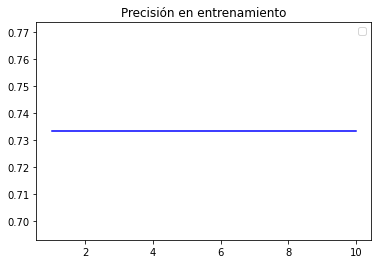

In [6]:
from matplotlib import pyplot
import pandas as pd
historial_modelo_inception = pd.read_csv('/content/gdrive/My Drive/historial_modelo_inception.csv').to_dict()
prec2 = list(historial_modelo_inception['acc'].values())
validacion_prec2 = list(historial_modelo_inception['val_acc'].values())
perdida2 = list(historial_modelo_inception['loss'].values())
validacion_perdida2 = list(historial_modelo_inception['val_loss'].values())
n_epochs2 = range(1, len(prec2) + 1)

pyplot.plot(n_epochs2, prec2, 'b')
#pyplot.plot(n_epochs2, validacion_prec2, 'b', label='Precisión en validación')
pyplot.title('Precisión en entrenamiento')
pyplot.legend()
pyplot.show()

No handles with labels found to put in legend.


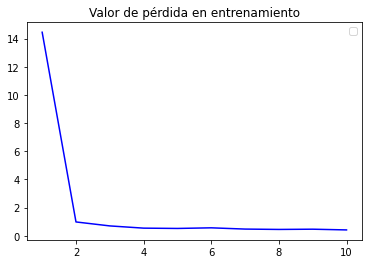

In [7]:
pyplot.plot(n_epochs2, perdida2, 'b')
#pyplot.plot(n_epochs2, val_loss2, 'b', label='Pérdida en validación')
pyplot.title('Valor de pérdida en entrenamiento')
pyplot.legend()
pyplot.show()

### Pruebas

In [22]:
historial_inception_test_prec = []
historial_inception_test_loss = []
pasos = 20
for i in range(pasos):
  ev = modelo_transfer_2.evaluate(generador_test, steps=50)
  historial_inception_test_loss.append(ev[0])
  historial_inception_test_prec.append(ev[1])
historial_inception_test = {}
historial_inception_test['acc'] = historial_inception_test_prec
historial_inception_test['loss'] = historial_inception_test_loss
pd.DataFrame.from_dict(historial_inception_test).to_csv('/content/gdrive/My Drive/historial_modelo_inception_test.csv',index=False)

50/50 [==============================] - 35s 704ms/step - loss: 0.4125 - acc: 0.7320


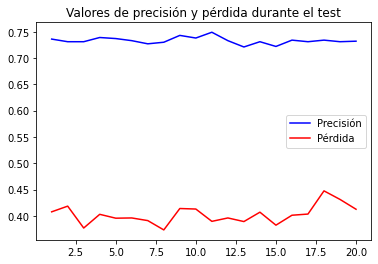

In [23]:
from matplotlib import pyplot

import pandas as pd

historial_inception_test = pd.read_csv('/content/gdrive/My Drive/historial_modelo_inception_test.csv').to_dict()
historial_inception_test_prec = list(historial_inception_test['acc'].values())
historial_inception_test_loss = list(historial_inception_test['loss'].values())


n_pasos = range(1, len(historial_inception_test_prec) + 1)

pyplot.plot(n_pasos, historial_inception_test_prec, 'b', label='Precisión')
pyplot.plot(n_pasos, historial_inception_test_loss, 'r', label='Pérdida')
pyplot.title('Valores de precisión y pérdida durante el test')
pyplot.legend()
pyplot.show()

## ResNet50


In [24]:
#Importamos la red ResNet50 desde keras
from keras.applications import ResNet50

#Inicializamos la red. Le indicamos que los pesos se inicialicen con los valores tras su entreno con el dataset 'imagenet', sin incluir la última capa, la cual no servirá para
#sustituirla por nuestra última capa, convirtiendo la red en un clasificador binario, e indicándole las dimensiones del tensor de entrada (las dimensiones de las imágenes).
modelo_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(150,150,3))

#Mostramos la red
modelo_resnet.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
__________________________